## Importing necessary libraries

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import os

## Reading the datasets

In [72]:
deliveries = pd.read_csv(r'deliveries.csv')
matches = pd.read_csv(r'matches.csv')

## Pre-processing the given dataset

In [73]:
### The given dataset has mistaken two names for the same team 'Rising Pune Supergiants'
deliveries = deliveries.replace(to_replace="Rising Pune Supergiant", value="Rising Pune Supergiants") 
matches = matches.replace(to_replace="Rising Pune Supergiant", value="Rising Pune Supergiants") 

### 'Delhi Daredevils' later changed their name to 'Delhi Capitals'
deliveries = deliveries.replace(to_replace="Delhi Daredevils", value ="Delhi Capitals") 
matches = matches.replace(to_replace="Delhi Daredevils", value="Delhi Capitals") 

### 'Deccan Chargers' announced a sale of their team and got a new name as 'Sunrisers Hyderabad'
deliveries = deliveries.replace(to_replace="Deccan Chargers", value="Sunrisers Hyderabad")
matches=matches.replace(to_replace="Deccan Chargers", value="Sunrisers Hyderabad")

In [42]:
deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Capitals', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [43]:
Teams={'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS' 
}

deliveries['batting_team']=deliveries['batting_team'].map(Teams)
deliveries['bowling_team']=deliveries['bowling_team'].map(Teams)

In [44]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,CSK,MI,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,CSK,MI,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,CSK,MI,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,CSK,MI,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


## Analysing the most successful team

In [45]:
# ASKING USER WHETHER TO SAVE THE PLOT ON THE DISK OR NOT 

if (input("Save/download plots? y/n: ").lower()[0] == 'y'):
  save_files = True
  print("\nPlots will be saved/downloaded.")
else:
  save_files = False
  print("Plots will not be saved/downloaded.")

Save/download plots? y/n: n
Plots will not be saved/downloaded.


In [46]:
matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

## Teams to have played and won most finals

In [47]:
finals = matches.drop_duplicates(subset=['season'], keep='last')
finals = finals[['id', 'season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner']]

most_finals = pd.concat([finals['team1'], finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'}, axis=1, inplace=True)
wins = finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(wins,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
#most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)

most_finals

,team,finals_played,won_count
0,Chennai Super Kings,8,3.0
1,Mumbai Indians,5,4.0
2,Sunrisers Hyderabad,3,2.0
3,Royal Challengers Bangalore,3,0.0
4,Kolkata Knight Riders,2,2.0
5,Kings XI Punjab,1,0.0
6,Rising Pune Supergiants,1,0.0
7,Rajasthan Royals,1,1.0


In [48]:
traceA=go.Bar(x=most_finals['team'], y=most_finals['finals_played'], name='Total Matches')
traceB=go.Bar(x=most_finals['team'], y=most_finals['won_count'], name='Matches wins')

bars = [traceA,traceB]
py.iplot(bars)

### The below function is generating a file, but the file doesn't contains any graph.
### Please select camera button on the plot to download it locally.
# save file

#if save_files:
#  if not os.path.exists('plots'):
#    os.makedirs('plots')
#  filename = 'plots/team_finals_and_wins'
#  plt.savefig(filename, bbox_inches = 'tight')


## No. of times 200+ scored by a team

In [49]:
scores = deliveries.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
scores

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
...,...,...,...,...,...
1166,11347,2,MI,KKR,137
1167,11412,1,CSK,MI,136
1168,11412,2,MI,CSK,140
1169,11415,1,MI,CSK,152


In [50]:
scores_200 = scores[scores['total_runs']>=200]
scores_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
30,20,1,RCB,GL,213
48,32,1,SRH,KXIP,207
56,36,1,SRH,KKR,209
76,50,1,KXIP,MI,230
...,...,...,...,...,...
1132,11326,2,KKR,RCB,219
1141,11333,1,RCB,KXIP,213
1149,11338,1,KKR,MI,241
1150,11338,2,MI,KKR,204


f:\docs\github\tsf-grip\task 5 sports data analysis\venvt5\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



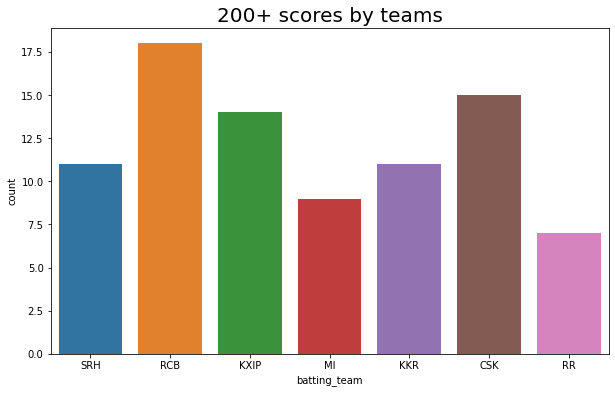

In [51]:
fig = plt.figure(figsize = (10, 6))
plt.title("200+ scores by teams", fontsize=20)
sns.countplot(scores_200['batting_team'])

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/teams_200s'
  plt.savefig(filename, bbox_inches = 'tight')

## Maximum score in each season

In [74]:
matches_list = []
total_innings = []
batting_team = []
runs = []

for match_no in deliveries['match_id'].unique():
    for innings in deliveries[ deliveries['match_id']==match_no ]['inning'].unique():
        df = deliveries[
                        (deliveries['match_id']==match_no) &
                        (deliveries['inning']==innings)
        ]
        total_runs = df['total_runs'].sum()
        runs.append(total_runs)
        matches_list.append(match_no)
        total_innings.append(innings)
        batting_team.append(df['batting_team'].unique()[0])

In [76]:
df1 = pd.DataFrame()
df1['match_id'] = matches_list
df1['total_runs'] = runs
df1['season'] = [matches[matches['id']==i]['season'].unique()[0] for i in matches_list] 
df1['batting_team'] = batting_team

df1

,match_id,total_runs,season,batting_team
0,1,207,2017,Sunrisers Hyderabad
1,1,172,2017,Royal Challengers Bangalore
2,2,184,2017,Mumbai Indians
3,2,187,2017,Rising Pune Supergiants
4,3,183,2017,Gujarat Lions
...,...,...,...,...
1523,11413,170,2019,Delhi Capitals
1524,11414,155,2019,Delhi Capitals
1525,11414,162,2019,Chennai Super Kings
1526,11415,152,2019,Mumbai Indians


In [77]:
season = []
teamId = []
max_runs = []
for year in df1['season'].unique():
    maximum_run = df1[ df1['season']==year ]['total_runs'].max()
    team = df1[ (df1['season']==year) & (df1['total_runs']==maximum_run) ]['batting_team'].unique()[0]
    season.append(year)
    teamId.append(team)
    max_runs.append(maximum_run)

max_runs

[230, 240, 211, 246, 232, 222, 263, 231, 235, 248, 250, 241]

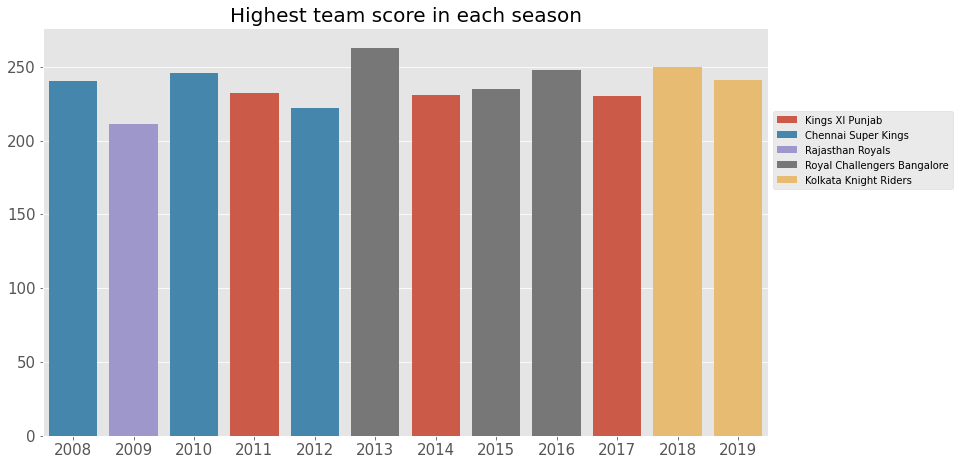

In [79]:
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(13,7.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Highest team score in each season",fontsize=20)
ax=sns.barplot(x = season, y = max_runs, hue = teamId, dodge=False)
ax.legend(loc = 'center left', bbox_to_anchor=(1,0.7))

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/teams_200s'
  plt.savefig(filename, bbox_inches = 'tight')

In [15]:
matches['team1']=matches['team1'].map(Teams)
matches['team2']=matches['team2'].map(Teams)

In [16]:
teams=(matches['team1'].value_counts()+matches['team2'].value_counts()).reset_index()
teams.columns=['team_name','Matches_played']
teams

,team_name,Matches_played
0,CSK,164
1,GL,30
2,KKR,178
3,KTK,14
4,KXIP,176
5,MI,187
6,PW,46
7,RCB,180
8,RPS,30
9,RR,147


In [17]:
matches['winner']=matches['winner'].map(Teams)

In [18]:
wins=matches['winner'].value_counts().reset_index()
wins.columns=['team_name','wins']
wins

,team_name,wins
0,MI,109
1,CSK,100
2,KKR,92
3,SRH,87
4,RCB,84
5,KXIP,82
6,RR,75
7,RPS,15
8,GL,13
9,PW,12


In [29]:
player=teams.merge(wins,left_on='team_name',right_on='team_name',how='inner')
player['%win']=(player['wins']/player['Matches_played'])*100
player = player.sort_values('%win', ascending=False)
player

,team_name,Matches_played,wins,%win
0,CSK,164,100,60.975610
5,MI,187,109,58.288770
2,KKR,178,92,51.685393
9,RR,147,75,51.020408
8,RPS,30,15,50.000000
10,SRH,183,87,47.540984
7,RCB,180,84,46.666667
4,KXIP,176,82,46.590909
1,GL,30,13,43.333333
3,KTK,14,6,42.857143


In [30]:
trace1=go.Bar(x=player['team_name'], y=player['Matches_played'], name='Total Matches')
trace2=go.Bar(x=player['team_name'], y=player['wins'], name='Matches wins')

In [31]:
data=[trace1,trace2]
py.iplot(data)

### The below function is generating a file, but the file doesn't contains any graph.
### Please select camera button on the plot to download it locally.

"""# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/teams_games_and_wins'
  plt.savefig(filename, bbox_inches = 'tight')"""

"# save file\nif save_files:\n  if not os.path.exists('plots'):\n    os.makedirs('plots')\n  filename = 'plots/teams_games_and_wins'\n  plt.savefig(filename, bbox_inches = 'tight')"

In [26]:
type(player)

pandas.core.frame.DataFrame